In [7]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

In [117]:
v = pd.read_csv("StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_LiangSteinNeuron.txt", sep = "\t")
v['CutNum'] = v["CutNum"].astype(str)

C:\Users\astar\AppData\Local\Temp\ipykernel_22972\604684875.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_LiangSteinNeuron.txt", sep = "\t")


In [123]:
v[v["Iteration"] == "Real"].tail(50)

,CTS_Cutoff,Metric,CutNum,Median fixed accessibility,Median fixed absolute log fold-change,Number fixed variants,Median polymorphic accessibility,Median polymorphic absolute log fold-change,Number polymorphic variants,Fisher exact p-value,...,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling,EffectOrTotal
234238,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,311.517655,0.016214,196615,309.435425,0.015937,53385,0.026048,...,0.001206,0.021504,0.015937,"[[99376, 97239], [26692, 26693]]","[[99376, 97239], [26693, 26692]]",0.5,All,Real,Real,Mean_CTS_Effect
234239,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,311.517655,0.016214,196615,309.435425,0.015937,53385,0.012572,...,0.001206,0.024562,0.021790,"[[79820, 116795], [21353, 32032]]","[[79821, 116794], [21354, 32031]]",0.6,All,Real,Real,Mean_CTS_Effect
234240,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,311.517655,0.016214,196615,309.435425,0.015937,53385,0.001537,...,0.001206,0.033121,0.030862,"[[60384, 136231], [16015, 37370]]","[[60385, 136230], [16016, 37369]]",0.7,All,Real,Real,Mean_CTS_Effect
234241,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,311.517655,0.016214,196615,309.435425,0.015937,53385,0.000162,...,0.001206,0.044805,0.050330,"[[40783, 155832], [10676, 42709]]","[[40783, 155832], [10677, 42708]]",0.8,All,Real,Real,Mean_CTS_Effect
234242,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,311.517655,0.016214,196615,309.435425,0.015937,53385,0.006698,...,0.001206,0.042946,0.148106,"[[20452, 176163], [5338, 48047]]","[[20452, 176163], [5339, 48046]]",0.9,All,Real,Real,Mean_CTS_Effect
234243,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,743.700195,0.027294,41551,741.124330,0.026005,11023,0.914822,...,0.017428,-0.004319,0.003517,"[[37379, 4172], [9920, 1103]]","[[37379, 4172], [9921, 1102]]",0.1,Top20th,Real,Real,Mean_CTS_Effect
234244,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,743.700195,0.027294,41551,741.124330,0.026005,11023,0.142426,...,0.017428,0.038780,0.007163,"[[33501, 8050], [8818, 2205]]","[[33501, 8050], [8819, 2204]]",0.2,Top20th,Real,Real,Mean_CTS_Effect
234245,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,743.700195,0.027294,41551,741.124330,0.026005,11023,0.001582,...,0.017428,0.071750,0.011383,"[[29727, 11824], [7716, 3307]]","[[29727, 11824], [7717, 3306]]",0.3,Top20th,Real,Real,Mean_CTS_Effect
234246,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,743.700195,0.027294,41551,741.124330,0.026005,11023,0.006868,...,0.017428,0.057654,0.017122,"[[25518, 16033], [6613, 4410]]","[[25518, 16033], [6614, 4409]]",0.4,Top20th,Real,Real,Mean_CTS_Effect
234247,0.9081903940111142-0.9310046403806176,Absolute log fold-change,500000,743.700195,0.027294,41551,741.124330,0.026005,11023,0.041226,...,0.017428,0.042909,0.026005,"[[21231, 20320], [5511, 5512]]","[[21231, 20320], [5512, 5511]]",0.5,Top20th,Real,Real,Mean_CTS_Effect


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '< 0.19770589778133996'),
  Text(1, 0, '0.19770589778133996-0.253885743351443'),
  Text(2, 0, '0.253885743351443-0.28560258551845097'),
  Text(3, 0, '0.28560258551845097-0.5098761815881774'),
  Text(4, 0, '0.5098761815881774-0.7634902330284021'),
  Text(5, 0, '0.7634902330284021-0.8096740358523931'),
  Text(6, 0, '0.8096740358523931-0.8892606108410587'),
  Text(7, 0, '> 0.8892606108410587')])

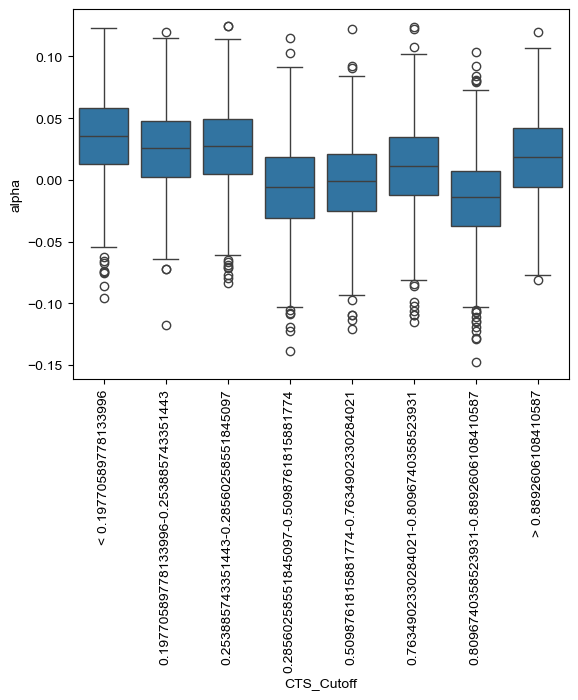

In [119]:
vp = v[v["Proportion"] == 0.9]
vp = vp[vp["Top_20th"] == "All"]
vp = vp[vp["EffectOrTotal"] == "Mean_CTS"]
Counter(vp["CutNum"])

sns.boxplot(data = vp, x = "CTS_Cutoff", y = "alpha")
plt.xticks(rotation = 90)

In [65]:
vp

,CTS_Cutoff,Metric,CutNum,Median fixed accessibility,Median fixed absolute log fold-change,Number fixed variants,Median polymorphic accessibility,Median polymorphic absolute log fold-change,Number polymorphic variants,Fisher exact p-value,...,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling,EffectOrTotal
144152,< 0.0005963342320456,Absolute log fold-change,50000,289.528028,0.001645,38956,289.917355,0.000256,11044,0.000000,...,0.000000,0.999966,0.000427,"[[38944, 12], [1104, 9940]]","[[38944, 12], [1105, 9939]]",0.9,All,Real,Real,Mean_CTS_Effect
144170,< 0.0005963342320456,Absolute log fold-change,50000,288.677167,0.001644,38956,291.656600,0.000257,10007,0.000000,...,0.000000,0.999969,0.000425,"[[38945, 11], [999, 9008]]","[[38945, 11], [1001, 9006]]",0.9,All,0,Bootstrap,Mean_CTS_Effect
144188,< 0.0005963342320456,Absolute log fold-change,50000,289.284955,0.001646,38956,291.598085,0.000256,10007,0.000000,...,0.000000,0.999957,0.000425,"[[38941, 15], [999, 9008]]","[[38941, 15], [1003, 9004]]",0.9,All,1,Bootstrap,Mean_CTS_Effect
144206,< 0.0005963342320456,Absolute log fold-change,50000,290.488733,0.001645,38956,287.621140,0.000257,10007,0.000000,...,0.000000,0.999971,0.000433,"[[38946, 10], [1000, 9007]]","[[38946, 10], [1001, 9006]]",0.9,All,2,Bootstrap,Mean_CTS_Effect
144224,< 0.0005963342320456,Absolute log fold-change,50000,290.378905,0.001646,38956,292.350710,0.000257,10007,0.000000,...,0.000000,0.999966,0.000425,"[[38944, 12], [997, 9010]]","[[38944, 12], [1003, 9004]]",0.9,All,3,Bootstrap,Mean_CTS_Effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288206,> 0.6260525120583623,Absolute log fold-change,50000,460.593300,0.312226,38956,465.260630,0.324005,10007,0.311744,...,0.999822,-0.038922,0.732243,"[[3763, 35193], [1000, 9007]]","[[3763, 35193], [1001, 9006]]",0.9,All,995,Bootstrap,Mean_CTS_Effect
288224,> 0.6260525120583623,Absolute log fold-change,50000,463.785585,0.315630,38956,462.341315,0.318384,10007,0.689608,...,0.896185,0.015252,0.723556,"[[3951, 35005], [1000, 9007]]","[[3951, 35005], [1002, 9005]]",0.9,All,996,Bootstrap,Mean_CTS_Effect
288242,> 0.6260525120583623,Absolute log fold-change,50000,464.508640,0.314432,38956,461.432980,0.313177,10007,0.374959,...,0.323401,-0.034053,0.721468,"[[3779, 35177], [1000, 9007]]","[[3779, 35177], [1001, 9006]]",0.9,All,997,Bootstrap,Mean_CTS_Effect
288260,> 0.6260525120583623,Absolute log fold-change,50000,462.711130,0.314171,38956,470.506915,0.318498,10007,0.459307,...,0.941366,0.027861,0.713088,"[[3995, 34961], [999, 9008]]","[[3995, 34961], [1002, 9005]]",0.9,All,998,Bootstrap,Mean_CTS_Effect


In [71]:
sns.boxplot(data = vp, x = "CTS_Cutoff", y = "alpha")
plt.xticks(rotation = 90)

ValueError: Could not interpret value `LFC_Cutoff` for `x`. An entry with this name does not appear in `data`.

In [81]:
vp

,LFC_Cutoff,Cutoff_num,Metric,Median fixed metric,Number fixed variants,Median polymorphic metric,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling
2,< 0.1034199,Mean_CTS_Effect,50000,0.691164,9246599,0.690437,2552024,2.054888e-13,4.427343e-14,1.030938e-13,2.213671e-14,0.011281,0.612941,"[[6494597, 2752002], [1786416, 765608]]","[[6494597, 2752002], [1786417, 765607]]",0.3,All,Real,Real
20,< 0.1034199,Mean_CTS_Effect,50000,0.690407,39386,0.690631,10614,8.721131e-01,5.727544e-01,5.708523e-01,7.136231e-01,-0.004005,0.613291,"[[27536, 11850], [7429, 3185]]","[[27536, 11850], [7430, 3184]]",0.3,All,0,Bootstrap
38,< 0.1034199,Mean_CTS_Effect,50000,0.689082,39386,0.692267,10614,1.476732e-01,1.797163e-01,9.291464e-01,9.101420e-01,-0.035320,0.615503,"[[27280, 12106], [7429, 3185]]","[[27280, 12106], [7430, 3184]]",0.3,All,1,Bootstrap
56,< 0.1034199,Mean_CTS_Effect,50000,0.691025,39386,0.692867,10614,9.809613e-01,3.561908e-01,4.944652e-01,8.219048e-01,0.000594,0.613479,"[[27574, 11812], [7429, 3185]]","[[27574, 11812], [7430, 3184]]",0.3,All,2,Bootstrap
74,< 0.1034199,Mean_CTS_Effect,50000,0.689470,39386,0.686927,10614,2.945394e-01,2.577714e-01,1.490975e-01,1.288857e-01,0.024829,0.611594,"[[27776, 11610], [7429, 3185]]","[[27776, 11610], [7430, 3184]]",0.3,All,3,Bootstrap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90002,> 0.4786203,Mean_CTS_Effect,Rest,0.833470,39386,0.828556,10614,2.486535e-02,2.817164e-03,1.272020e-02,1.408582e-03,0.052422,0.730239,"[[28006, 11380], [7427, 3187]]","[[28006, 11380], [7430, 3184]]",0.3,All,995,Bootstrap
90020,> 0.4786203,Mean_CTS_Effect,Rest,0.833534,39386,0.826903,10614,6.175833e-05,1.549015e-05,3.201940e-05,7.745073e-06,0.091949,0.725161,"[[28353, 11033], [7429, 3185]]","[[28353, 11033], [7431, 3183]]",0.3,All,996,Bootstrap
90038,> 0.4786203,Mean_CTS_Effect,Rest,0.834968,39386,0.830372,10614,4.814417e-02,1.105339e-02,2.451452e-02,5.526696e-03,0.046364,0.730472,"[[27958, 11428], [7427, 3187]]","[[27958, 11428], [7432, 3182]]",0.3,All,997,Bootstrap
90056,> 0.4786203,Mean_CTS_Effect,Rest,0.834292,39386,0.829735,10614,1.313067e-03,1.744089e-03,6.779784e-04,8.720447e-04,0.074338,0.728051,"[[28198, 11188], [7428, 3186]]","[[28198, 11188], [7431, 3183]]",0.3,All,998,Bootstrap


In [116]:
v = pd.read_csv("UseCTS_FilterNewTEs_EE_Group1_SpecSup250_PhyloP447_LiangSteinNeuron.txt", sep = "\t")
#v['CutNum'] = v["CutNum"].astype(str)
vp = v[v["Proportion"] == 0.9]
vp = vp[vp["Top_20th"] == "All"]
v

C:\Users\astar\AppData\Local\Temp\ipykernel_22972\3313126105.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("UseCTS_FilterNewTEs_EE_Group1_SpecSup250_PhyloP447_LiangSteinNeuron.txt", sep = "\t")


,PhyloP_Cutoff,Cutoff_num,Metric,Median fixed metric,Number fixed variants,Median polymorphic metric,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling
0,< 0.972,Mean_CTS_Effect,50000,0.085313,1896783,0.083009,499534,4.016970e-10,2.206569e-56,2.029178e-10,1.103285e-56,0.032782,0.014542,"[[1712719, 184064], [449580, 49954]]","[[1712719, 184064], [449581, 49953]]",0.1,All,Real,Real
1,< 0.972,Mean_CTS_Effect,50000,0.085313,1896783,0.083009,499534,1.438530e-18,2.206569e-56,7.302172e-19,1.103285e-56,0.034505,0.029491,"[[1527972, 368811], [399627, 99907]]","[[1527972, 368811], [399628, 99906]]",0.2,All,Real,Real
2,< 0.972,Mean_CTS_Effect,50000,0.085313,1896783,0.083009,499534,1.981136e-30,2.206569e-56,9.986675e-31,1.103285e-56,0.039134,0.045335,"[[1343520, 553263], [349673, 149861]]","[[1343520, 553263], [349674, 149860]]",0.3,All,Real,Real
3,< 0.972,Mean_CTS_Effect,50000,0.085313,1896783,0.083009,499534,1.275452e-36,2.206569e-56,6.470214e-37,1.103285e-56,0.040269,0.062905,"[[1156702, 740081], [299720, 199814]]","[[1156702, 740081], [299721, 199813]]",0.4,All,Real,Real
4,< 0.972,Mean_CTS_Effect,50000,0.085313,1896783,0.083009,499534,4.073068e-39,2.206569e-56,2.068319e-39,1.103285e-56,0.040764,0.083009,"[[968122, 928661], [249766, 249768]]","[[968122, 928661], [249767, 249767]]",0.5,All,Real,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90085,> 4.617,Mean_CTS_Effect,Rest,0.143272,20053,0.138691,5897,1.016785e-01,1.046967e-01,5.164567e-02,5.234834e-02,0.047552,0.138691,"[[10269, 9784], [2947, 2950]]","[[10269, 9784], [2949, 2948]]",0.5,Top20th,999,Bootstrap
90086,> 4.617,Mean_CTS_Effect,Rest,0.143272,20053,0.138691,5897,1.155225e-01,1.046967e-01,5.926859e-02,5.234834e-02,0.046480,0.178247,"[[8252, 11801], [2358, 3539]]","[[8252, 11801], [2360, 3537]]",0.6,Top20th,999,Bootstrap
90087,> 4.617,Mean_CTS_Effect,Rest,0.143272,20053,0.138691,5897,1.699241e-01,1.046967e-01,8.547741e-02,5.234834e-02,0.043674,0.224678,"[[6207, 13846], [1769, 4128]]","[[6207, 13846], [1770, 4127]]",0.7,Top20th,999,Bootstrap
90088,> 4.617,Mean_CTS_Effect,Rest,0.143272,20053,0.138691,5897,4.787569e-01,1.046967e-01,2.426770e-01,5.234834e-02,0.026176,0.292860,"[[4095, 15958], [1178, 4719]]","[[4095, 15958], [1180, 4717]]",0.8,Top20th,999,Bootstrap


([0, 1, 2, 3, 4],
 [Text(0, 0, '< 0.972'),
  Text(1, 0, '0.972-1.615'),
  Text(2, 0, '1.615-2.342'),
  Text(3, 0, '2.342-4.617'),
  Text(4, 0, '> 4.617')])

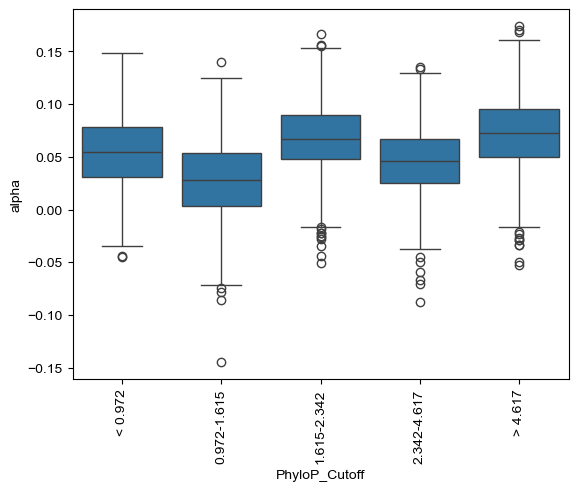

In [107]:
sns.boxplot(data = vp, x = "PhyloP_Cutoff", y = "alpha")
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4],
 [Text(0, 0, '< 0.1034199'),
  Text(1, 0, '0.1034199-0.158097'),
  Text(2, 0, '0.158097-0.23004521'),
  Text(3, 0, '0.23004521-0.4786203'),
  Text(4, 0, '> 0.4786203')])

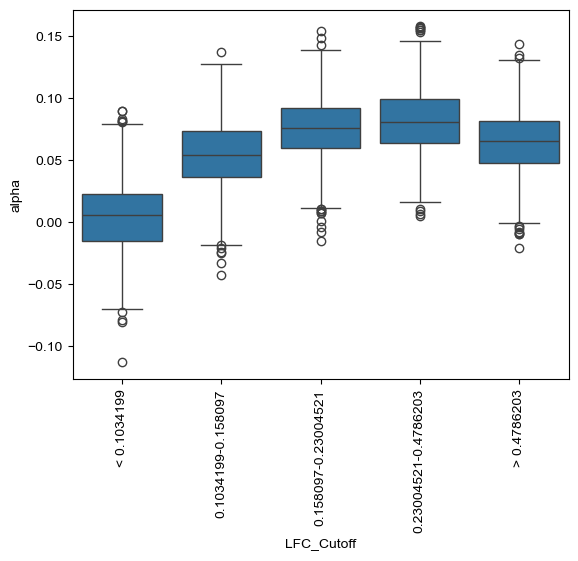

In [78]:
sns.boxplot(data = vp, x = "LFC_Cutoff", y = "alpha")
plt.xticks(rotation = 90)

In [30]:
Counter(vp["Iteration"])

Counter({'Real': 8,
         '0': 8,
         '1': 8,
         '2': 8,
         '3': 8,
         '4': 8,
         '5': 8,
         '6': 8,
         '7': 8,
         '8': 8,
         '9': 8,
         '10': 8,
         '11': 8,
         '12': 8,
         '13': 8,
         '14': 8,
         '15': 8,
         '16': 8,
         '17': 8,
         '18': 8,
         '19': 8,
         '20': 8,
         '21': 8,
         '22': 8,
         '23': 8,
         '24': 8,
         '25': 8,
         '26': 8,
         '27': 8,
         '28': 8,
         '29': 8,
         '30': 8,
         '31': 8,
         '32': 8,
         '33': 8,
         '34': 8,
         '35': 8,
         '36': 8,
         '37': 8,
         '38': 8,
         '39': 8,
         '40': 8,
         '41': 8,
         '42': 8,
         '43': 8,
         '44': 8,
         '45': 8,
         '46': 8,
         '47': 8,
         '48': 8,
         '49': 8,
         '50': 8,
         '51': 8,
         '52': 8,
         '53': 8,
         '54': 8,


In [25]:
vp.columns

Index(['CTS_Cutoff', 'Metric', 'CutNum', 'Median fixed accessibility',
       'Median fixed absolute log fold-change', 'Number fixed variants',
       'Median polymorphic accessibility',
       'Median polymorphic absolute log fold-change',
       'Number polymorphic variants', 'Fisher exact p-value', 'MWU p-value',
       'Fisher exact p-value; alt greater', 'MWU p-value; alt greater',
       'alpha', 'Cutoff', '[[dc1, du1], [pc1, pu1]]',
       '[[dc2, du2], [pc2, pu2]]', 'Proportion', 'Top_20th', 'Iteration',
       'TypeOfSampling', 'EffectOrTotal'],
      dtype='object')